In [3]:
import pickle
%matplotlib inline
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
from ipywidgets import widgets
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import auc
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from imblearn.metrics import sensitivity_specificity_support
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier)

Survived: 1103908
Died: 157125
Proportion: 7.03 : 1


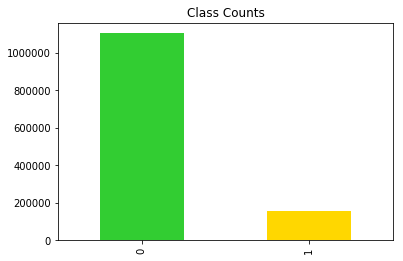

In [9]:
# Importing the dataset
dataset = pd.read_csv('11_Updated_Data.csv')
X = dataset.drop(['Educ_Elem', 'Poverty_Gr2', 'Res_Pacific', 'Race', 'HispOr', 'Record','IndDea','Age', 'Age_Cat55', 'Age_Cat21', 'HhNum', 'Follow'], axis=1)
y = dataset.loc[:, 'IndDea']
IndDea = dataset.IndDea.value_counts()
print('Survived:', IndDea[0])
print('Died:', IndDea[1])
print('Proportion:', round(IndDea[0] / IndDea[1], 2), ': 1')
my_colors=["limegreen", "gold"]
IndDea.plot(kind='bar', title='Class Counts', color=my_colors)

In [10]:
# Splitting the dataset into the Training set and Test set prior to fitting / resampling
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Identify statistically significant variables
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
print(regressor_OLS.summary())

#import statsmodels.api as sm
#from pandas.core import datetools
y_pred_ols = regressor_OLS.predict(X_test)
print('Predicted values: ', regressor_OLS.predict())

                            OLS Regression Results                            
Dep. Variable:                 IndDea   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                 2.172e+04
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:39:49   Log-Likelihood:            -1.2883e+05
No. Observations:             1008826   AIC:                         2.577e+05
Df Residuals:                 1008796   BIC:                         2.581e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age_Cat35          -0.0658      0.001    -

In [7]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

  Train Time: 5.035s 
[[179045  41539]
 [  5850  25773]]
 Sensitivity_Specificity_Support:   (0.8121027568624186, 0.8145915579313353, None)
 Recall Score:   0.8150080637510673
 Accuracy Score:   0.8121027568624186


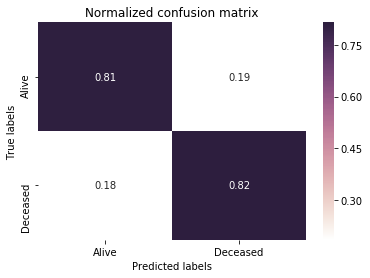

In [12]:
# Logistic Regression with balanced classes
logreg = LogisticRegression(C=1, class_weight='balanced')
t0 = time()
lr = logreg.fit(X_train, y_train)
train_time_lr = time() - t0
print(color.BOLD, color.BLUE, "Train Time: %0.3fs" % train_time_lr, color.END)
y_pred_lr = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
cm1 = (cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(cm1, annot=True, ax = ax, cmap=cmap); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Normalized confusion matrix'); 
ax.xaxis.set_ticklabels(['Alive', 'Deceased']); ax.yaxis.set_ticklabels(['Alive', 'Deceased']);
print(cm)
print(color.BOLD, 'Sensitivity_Specificity_Support: ', color.END, sensitivity_specificity_support(y_test, y_pred_lr, average='weighted')) #Sensitivity (ratio TP / (TP + FN) - quantifies the ability to avoid false negatives)
print(color.BOLD, 'Recall Score: ', color.END, recall_score(y_test, y_pred_lr)) #The recall score is the ability of the classifier to find all the positive samples
print(color.BOLD, 'Accuracy Score: ', color.END, accuracy_score(y_test, y_pred_lr))

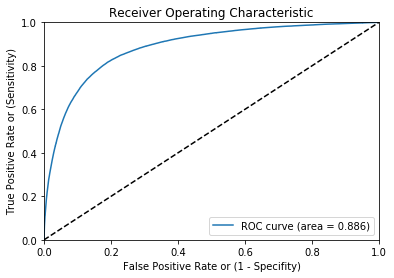

In [13]:
# Plotting ROC curve for logistic regression model
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba[:5]
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plot_roc_curve(y_test, y_pred_proba)

In [14]:
# Pickling Logistic Regression Model
label = "Mortality Logistic Regression"
outpath = label.lower().replace(" ", "-") + ".pickle"
with open(outpath, 'wb') as f:
    pickle.dump(lr, f)

  Train Time: 8.156s 
[[175145  45439]
 [  7120  24503]]
 Sensitivity_Specificity_Support:   (0.7916037223391896, 0.7772496104217654, None)
 Recall Score:   0.7748474211807861
 Accuracy Score:   0.7916037223391896


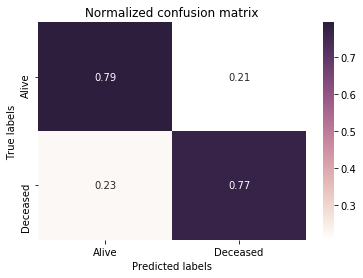

In [8]:
# Random Forest Classifier with balanced classes
n_estimator = 25
clf_rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator, random_state=12, class_weight='balanced')
t0 = time()
clf_rf.fit(X_train, y_train)
train_time_rf = time() - t0
print(color.BOLD, color.BLUE, "Train Time: %0.3fs" % train_time_rf, color.END)
y_pred_rf = clf_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
cm1 = (cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(cm1, annot=True, ax = ax, cmap=cmap); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Normalized confusion matrix'); 
ax.xaxis.set_ticklabels(['Alive', 'Deceased']); ax.yaxis.set_ticklabels(['Alive', 'Deceased']);
print(cm)
print(color.BOLD, 'Sensitivity_Specificity_Support: ', color.END, sensitivity_specificity_support(y_test, y_pred_rf, average='weighted')) #Sensitivity (ratio TP / (TP + FN) - quantifies the ability to avoid false negatives)
print(color.BOLD, 'Recall Score: ', color.END, recall_score(y_test, y_pred_rf)) #The recall score is the ability of the classifier to find all the positive samples
print(color.BOLD, 'Accuracy Score: ', color.END, accuracy_score(y_test, y_pred_rf))

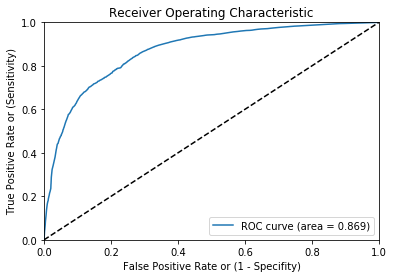

In [9]:
# Plotting ROC curve for random forest classifier model
y_pred_proba_rf = clf_rf.predict_proba(X_test)
y_pred_proba_rf[:5]
def plot_roc_curve(y_test, y_pred_proba_rf):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plot_roc_curve(y_test, y_pred_proba_rf)

  Train Time: 13.505s 
[[160738  59846]
 [  7601  24022]]
 Sensitivity_Specificity_Support:   (0.7325728469075006, 0.7557570504191853, None)
 Recall Score:   0.7596369730892072
 Accuracy Score:   0.7325728469075006


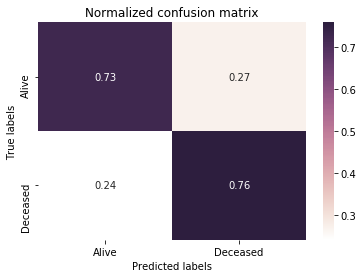

In [10]:
# Unsupervised transformation based on totally random trees
n_estimator = 10
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator, random_state=0)
rt_lm = LogisticRegression(class_weight='balanced')
pipeline = make_pipeline(rt, rt_lm)
t0 = time()
pipeline.fit(X_train, y_train)
train_time_rt = time() - t0
print(color.BOLD, color.BLUE, "Train Time: %0.3fs" % train_time_rt, color.END)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)
y_pred_rt_1 = np.around(y_pred_rt)
cm = confusion_matrix(y_test, y_pred_rt_1)
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
cm1 = (cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(cm1, annot=True, ax = ax, cmap=cmap); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Normalized confusion matrix'); 
ax.xaxis.set_ticklabels(['Alive', 'Deceased']); ax.yaxis.set_ticklabels(['Alive', 'Deceased']);
print(cm)
print(color.BOLD, 'Sensitivity_Specificity_Support: ', color.END, sensitivity_specificity_support(y_test, y_pred_rt_1, average='weighted')) #Sensitivity (ratio TP / (TP + FN) - quantifies the ability to avoid false negatives)
print(color.BOLD, 'Recall Score: ', color.END, recall_score(y_test, y_pred_rt_1)) #The recall score is the ability of the classifier to find all the positive samples
print(color.BOLD, 'Accuracy Score: ', color.END, accuracy_score(y_test, y_pred_rt_1))

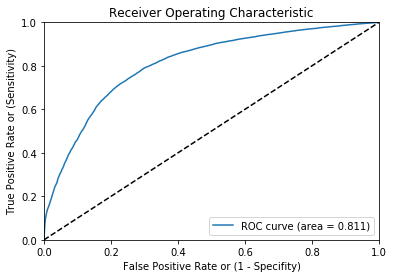

In [12]:
# Plotting ROC curve for random trees + logistic regression model
y_pred_rt[:5]
def plot_roc_curve(y_test, y_pred_rt):
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_rt[:, 1])
    roc_auc = auc(fpr_rt_lm, tpr_rt_lm)
    plt.plot(fpr_rt_lm, tpr_rt_lm, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plot_roc_curve(y_test, y_pred_rt)

  Train Time: 519.398s 
[[187989  32595]
 [ 10009  21614]]
 Sensitivity_Specificity_Support:   (0.831075267538173, 0.704647760310252, None)
 Recall Score:   0.6834898649716978
 Accuracy Score:   0.831075267538173


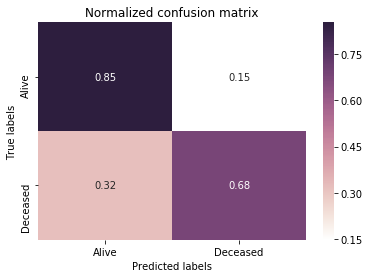

In [13]:
# Pipeline Model: Synthetic Minority Oversampling(SMOTE) + Principal Component Analysis(PCA) + K-Nearest Neighbours(KNN) Methods
pca = PCA()
smt = SMOTE(random_state=42)
knn = KNN()
pipeline = Pipeline([('smt', smt), ('pca', pca), ('knn', knn)])
t0 = time()
pipeline.fit(X_train, y_train) 
train_time_ppl = time() - t0
print(color.BOLD, color.BLUE, "Train Time: %0.3fs" % train_time_ppl, color.END)
y_pred_ppl = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred_ppl)
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
cm1 = (cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(cm1, annot=True, ax = ax, cmap=cmap); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Normalized confusion matrix'); 
ax.xaxis.set_ticklabels(['Alive', 'Deceased']); ax.yaxis.set_ticklabels(['Alive', 'Deceased']);
print(cm)
print(color.BOLD, 'Sensitivity_Specificity_Support: ', color.END, sensitivity_specificity_support(y_test, y_pred_ppl, average='weighted')) #Sensitivity (ratio TP / (TP + FN) - quantifies the ability to avoid false negatives)
print(color.BOLD, 'Recall Score: ', color.END, recall_score(y_test, y_pred_ppl)) #The recall score is the ability of the classifier to find all the positive samples
print(color.BOLD, 'Accuracy Score: ', color.END, accuracy_score(y_test, y_pred_ppl))

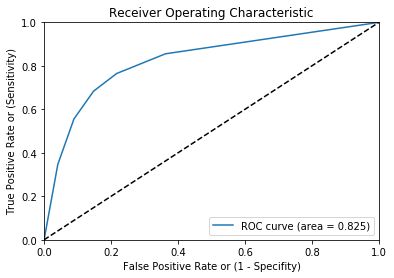

In [14]:
# Plotting ROC curve for Pipeline model
y_pred_proba_ppl = pipeline.predict_proba(X_test)
y_pred_proba_ppl[:5]
def plot_roc_curve(y_test, y_pred_proba_ppl):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_ppl[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plot_roc_curve(y_test, y_pred_proba_ppl)

Original dataset shape Counter({0: 883324, 1: 125502})
Resampled dataset shape Counter({0: 883323, 1: 883323})
  Train Time: 24504.125s 
[[179840  40744]
 [  5982  25641]]
 Sensitivity_Specificity_Support:   (0.8147315498776798, 0.8113926570911497, None)
 Recall Score:   0.8108338867280144
 Accuracy Score:   0.8147315498776798


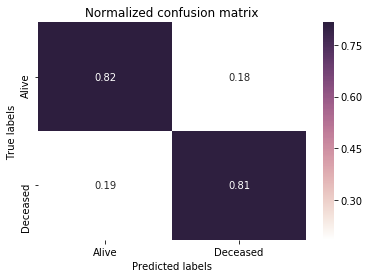

In [15]:
# Resampling Data Set: SMOTETomek (Over + Under Sampling) + Logistic Regression
print('Original dataset shape {}'.format(Counter(y_train)))
smt = SMOTETomek(ratio='auto')
t0 = time()
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train_smt)))
logreg = LogisticRegression(C=1)
logreg.fit(X_train_smt, y_train_smt)
train_time_smt = time() - t0
print(color.BOLD, color.BLUE, "Train Time: %0.3fs" % train_time_smt, color.END)
y_pred_smt = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_smt)
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
cm1 = (cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(cm1, annot=True, ax = ax, cmap=cmap); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Normalized confusion matrix'); 
ax.xaxis.set_ticklabels(['Alive', 'Deceased']); ax.yaxis.set_ticklabels(['Alive', 'Deceased']);
print(cm)
print(color.BOLD, 'Sensitivity_Specificity_Support: ', color.END, sensitivity_specificity_support(y_test, y_pred_smt, average='weighted')) #Sensitivity (ratio TP / (TP + FN) - quantifies the ability to avoid false negatives)
print(color.BOLD, 'Recall Score: ', color.END, recall_score(y_test, y_pred_smt)) #The recall score is the ability of the classifier to find all the positive samples
print(color.BOLD, 'Accuracy Score: ', color.END, accuracy_score(y_test, y_pred_smt))

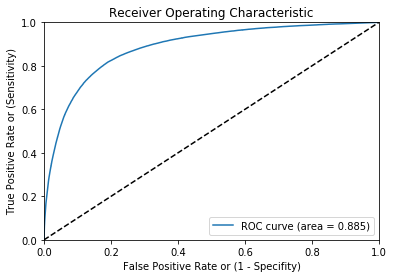

In [16]:
# Plotting ROC curve for SMOTETomek + Logistic Regression Model
y_pred_smt_proba = logreg.predict_proba(X_test)
y_pred_smt_proba[:5]
def plot_roc_curve(y_test, y_pred_smt_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_smt_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plot_roc_curve(y_test, y_pred_smt_proba)

  Train Time: 27263.335s 
[[196985  23599]
 [  9696  21927]]
 Sensitivity_Specificity_Support:   (0.8679854246710044, 0.7184181120241094, None)
 Recall Score:   0.6933877241248458
 Accuracy Score:   0.8679854246710044


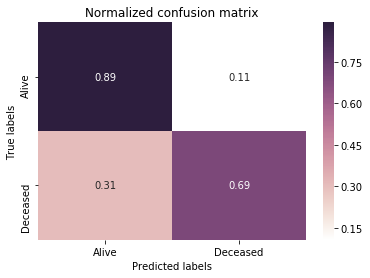

In [17]:
# Resampling Data Set: SMOTEENN (Over + Under Sampling) algorithm + Logistic Regression
sme = SMOTEENN(random_state=42)
t0 = time()
X_train_sme, y_train_sme = sme.fit_sample(X_train, y_train)
#Saving resampled data to a csv file for later access
#df_X = pd.DataFrame(X_train_sme)
#df_X.to_csv("11_ResampledData_X_train.csv", encoding='utf-8', index=False)
#df_y = pd.DataFrame(y_train_sme)
#df_y.to_csv("11_ResampledData_y_train.csv", encoding='utf-8', index=False)
logreg = LogisticRegression(C=1)
logreg.fit(X_train_sme, y_train_sme)
train_time_sme = time() - t0
print(color.BOLD, color.BLUE, "Train Time: %0.3fs" % train_time_sme, color.END)
y_pred_sme = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_sme)
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
cm1 = (cm.astype(np.float64) / cm.sum(axis=1, keepdims=1))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(cm1, annot=True, ax = ax, cmap=cmap); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Normalized confusion matrix'); 
ax.xaxis.set_ticklabels(['Alive', 'Deceased']); ax.yaxis.set_ticklabels(['Alive', 'Deceased']);
print(cm)
print(color.BOLD, 'Sensitivity_Specificity_Support: ', color.END, sensitivity_specificity_support(y_test, y_pred_sme, average='weighted')) #Sensitivity (ratio TP / (TP + FN) - quantifies the ability to avoid false negatives)
print(color.BOLD, 'Recall Score: ', color.END, recall_score(y_test, y_pred_sme)) #The recall score is the ability of the classifier to find all the positive samples
print(color.BOLD, 'Accuracy Score: ', color.END, accuracy_score(y_test, y_pred_sme))

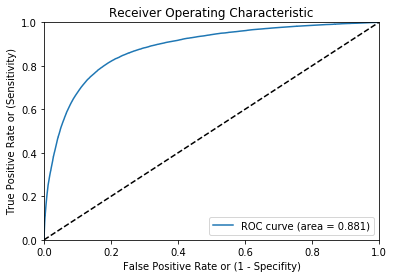

In [18]:
# Plotting ROC Curve for SMOTEENN + Logistic Regression Model
y_pred_sme_proba = logreg.predict_proba(X_test)
y_pred_sme_proba[:5]
def plot_roc_curve(y_test, y_pred_sme_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_sme_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
plot_roc_curve(y_test, y_pred_sme_proba)

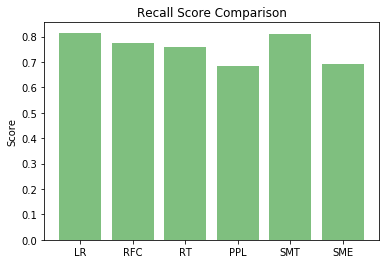

In [19]:
# Saving recall score (rs) of all models into a variable to plot the bar charts for comparison
lr_rs=recall_score(y_test, y_pred_lr)
rfc_rs=recall_score(y_test, y_pred_rf)
ppl_rs=recall_score(y_test, y_pred_ppl)
rt_rs=recall_score(y_test, y_pred_rt_1)
smt_rs=recall_score(y_test, y_pred_smt)
sme_rs=recall_score(y_test, y_pred_sme)

objects = ('LR', 'RFC', 'RT', 'PPL', 'SMT', 'SME')
y_pos = np.arange(len(objects))
performance = [lr_rs, rfc_rs, rt_rs, ppl_rs, smt_rs, sme_rs]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='g')
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Recall Score Comparison')
 
plt.show()

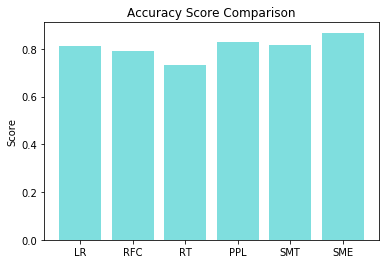

In [21]:
# Saving accurancy score (as) of all models into a variable to plot the bar charts for comparison
lr_as=accuracy_score(y_test, y_pred_lr)
rfc_as=accuracy_score(y_test, y_pred_rf)
ppl_as=accuracy_score(y_test, y_pred_ppl)
rt_as=accuracy_score(y_test, y_pred_rt_1)
smt_as=accuracy_score(y_test, y_pred_smt)
sme_as=accuracy_score(y_test, y_pred_sme)

objects = ('LR', 'RFC', 'RT', 'PPL', 'SMT', 'SME')
y_pos = np.arange(len(objects))
performance = [lr_as, rfc_as, rt_as, ppl_as, smt_as, sme_as]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='c')
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Accuracy Score Comparison')
 
plt.show()

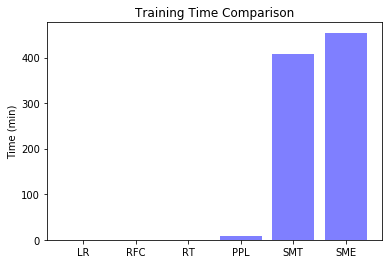

In [22]:
# Comparing Training time
objects = ('LR', 'RFC', 'RT', 'PPL', 'SMT', 'SME')
y_pos = np.arange(len(objects))
performance = [train_time_lr/60, train_time_rf/60, train_time_rt/60, train_time_ppl/60, train_time_smt/60, train_time_sme/60]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, objects)
plt.ylabel('Time (min)')
plt.title('Training Time Comparison')
 
plt.show()

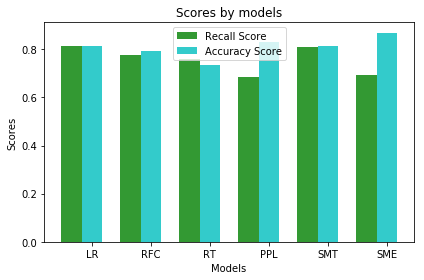

In [23]:
# Comparing Recall and Accuracy Scores for each model
n_groups = 6
rec_sc = [lr_rs, rfc_rs, rt_rs, ppl_rs, smt_rs, sme_rs]
acc_sc = [lr_as, rfc_as, rt_as, ppl_as, smt_as, sme_as]
 
# Creating the plot
figsize=(14, 10)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, rec_sc, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Recall Score')
 
rects2 = plt.bar(index + bar_width, acc_sc, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Accuracy Score')
 
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Scores by models')
plt.xticks(index + bar_width, ('LR', 'RFC', 'RT', 'PPL', 'SMT', 'SME'))
plt.legend()
 
plt.tight_layout()
plt.show()